In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load your dataset
# Assuming you have a CSV file named 'data.csv'
df = pd.read_csv('/Users/aplle/Documents/bank-subscribed_19.csv')


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1.0,-1.0,0.0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1.0,-1.0,0.0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1.0,-1.0,0.0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1.0,-1.0,0.0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1.0,-1.0,0.0,NaN,no


In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8041 non-null   int64  
 1   job        8019 non-null   object 
 2   marital    8041 non-null   object 
 3   education  7664 non-null   object 
 4   default    8041 non-null   object 
 5   balance    8041 non-null   int64  
 6   housing    8041 non-null   object 
 7   loan       8041 non-null   object 
 8   contact    0 non-null      float64
 9   day        8041 non-null   int64  
 10  month      8041 non-null   object 
 11  duration   8041 non-null   int64  
 12  campaign   8040 non-null   float64
 13  pdays      8040 non-null   float64
 14  previous   8040 non-null   float64
 15  poutcome   0 non-null      float64
 16  Target     8040 non-null   object 
dtypes: float64(5), int64(4), object(8)
memory usage: 1.0+ MB
None


In [6]:
# Summary statistics for numerical columns
print(df.describe())

               age       balance  contact          day     duration  \
count  8041.000000   8041.000000      0.0  8041.000000  8041.000000   
mean     39.446835   1012.994901      NaN    17.554409   264.993160   
std       9.244936   2470.228317      NaN     8.285143   249.772337   
min      20.000000  -3372.000000      NaN     2.000000     0.000000   
25%      32.000000     40.000000      NaN     9.000000   118.000000   
50%      38.000000    323.000000      NaN    16.000000   193.000000   
75%      46.000000   1026.000000      NaN    26.000000   322.000000   
max      61.000000  58544.000000      NaN    30.000000  3366.000000   

          campaign   pdays  previous  poutcome  
count  8040.000000  8040.0    8040.0       0.0  
mean      2.538557    -1.0       0.0       NaN  
std       2.850901     0.0       0.0       NaN  
min       1.000000    -1.0       0.0       NaN  
25%       1.000000    -1.0       0.0       NaN  
50%       2.000000    -1.0       0.0       NaN  
75%       3.00000

In [7]:
# Check for missing values
print(df.isnull().sum())

age             0
job            22
marital         0
education     377
default         0
balance         0
housing         0
loan            0
contact      8041
day             0
month           0
duration        0
campaign        1
pdays           1
previous        1
poutcome     8041
Target          1
dtype: int64


In [8]:
#remove columns "contact" and "poutcome"
df.drop(["contact","poutcome"],axis=1,inplace=True) 


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1.0,-1.0,0.0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1.0,-1.0,0.0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1.0,-1.0,0.0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,92,1.0,-1.0,0.0,no
4,33,NaN,single,NaN,no,1,no,no,5,may,198,1.0,-1.0,0.0,no


In [10]:
# Specifying columns that are numerical with NaN values
numerical_columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']


# Removing rows with NaN values in the specified numerical columns
df.dropna(subset=numerical_columns, inplace=True)


In [11]:
"""To remove NAN values in data I will fill missing values, though,
for features like job, amount of NAN values is negligble and row can be removed.
Computing the mode for categorical data job"""

mode_value=df['job'].mode()
print(mode_value)
print(mode_value[0])

0    blue-collar
Name: job, dtype: object
blue-collar


In [12]:
"""Assign mode_value[0] to categorical entry job as missing values using .fillna()"""
df['job']=df['job'].fillna(value=mode_value[0])

In [13]:
mode_value=df['education'].mode()
print(mode_value)
print(mode_value[0])

0    secondary
Name: education, dtype: object
secondary


In [14]:
"""Assign mode_value[0] to categorical entry job as missing values using .fillna()"""
df['education']=df['education'].fillna(value=mode_value[0])

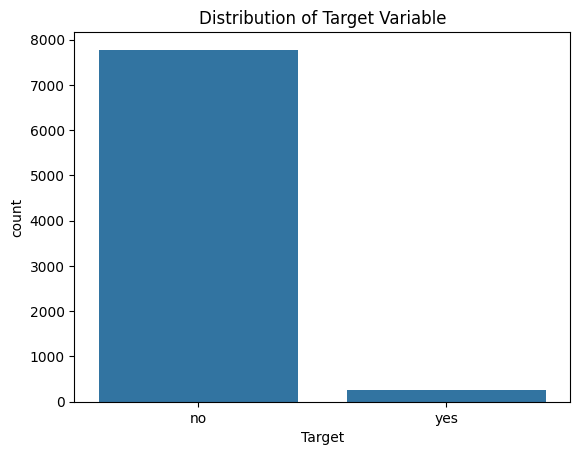

In [15]:
# Explore the distribution of the target variable
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()


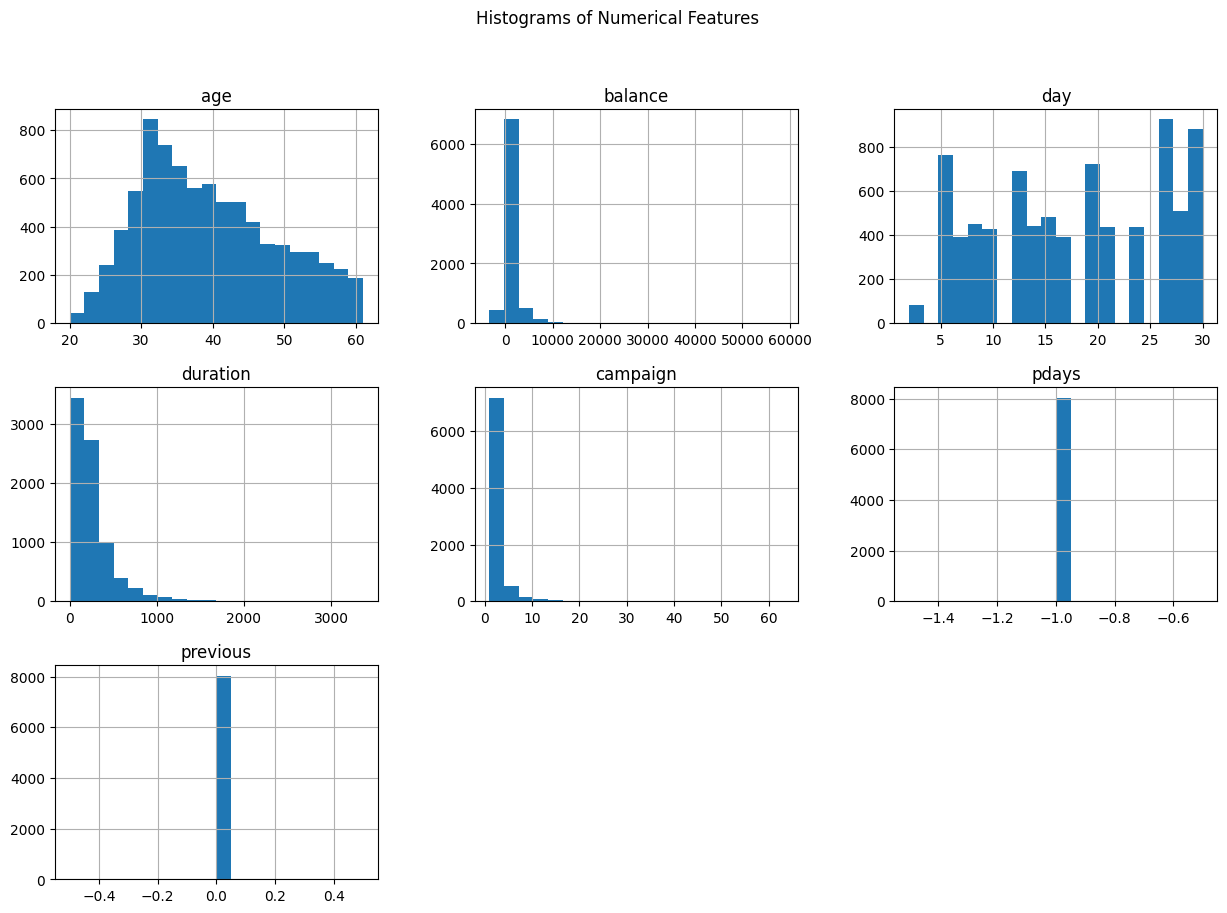

In [16]:
# Explore the distribution of numerical features
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


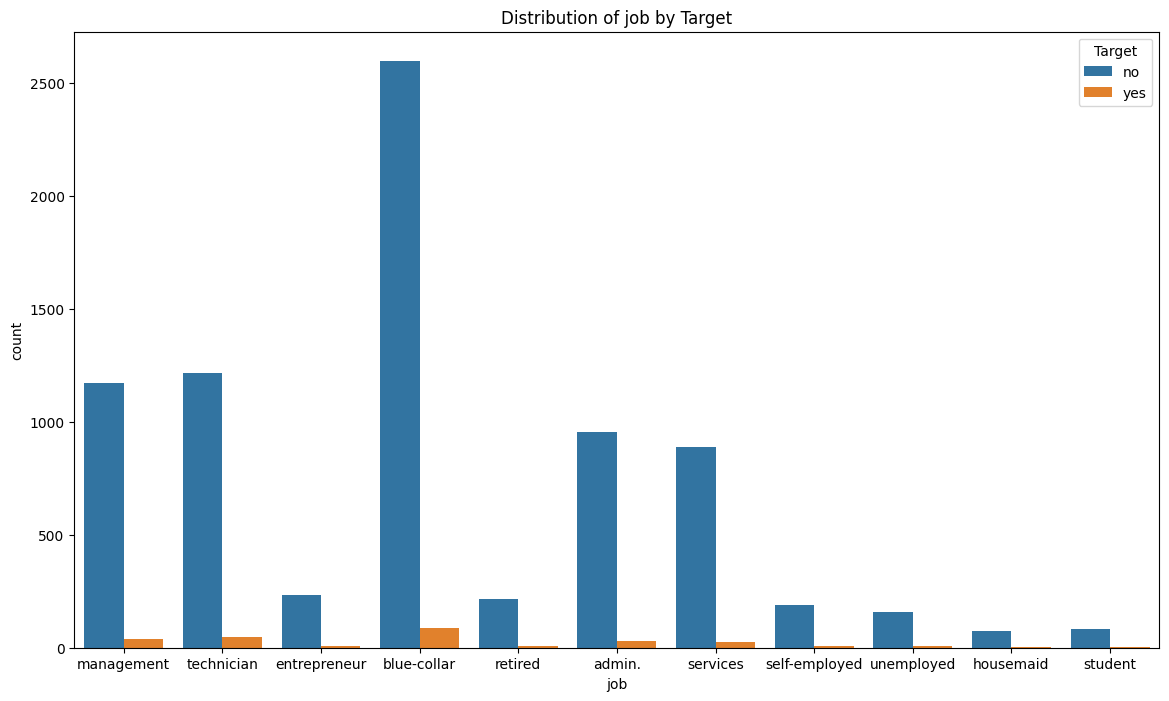

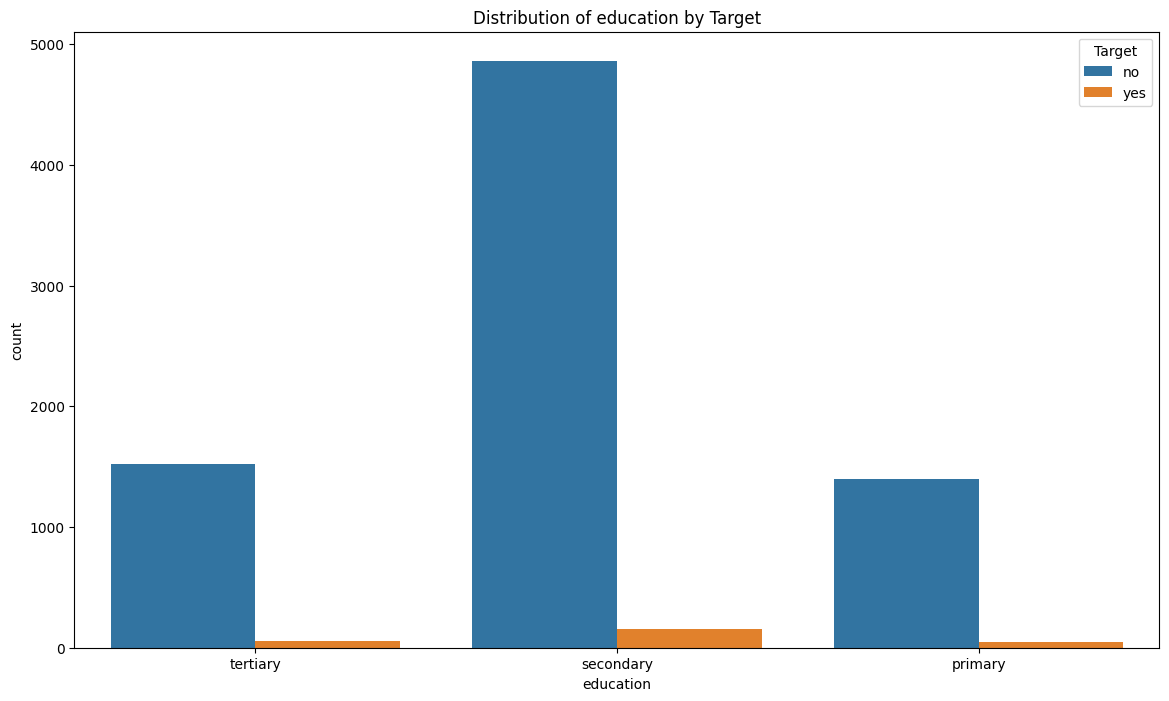

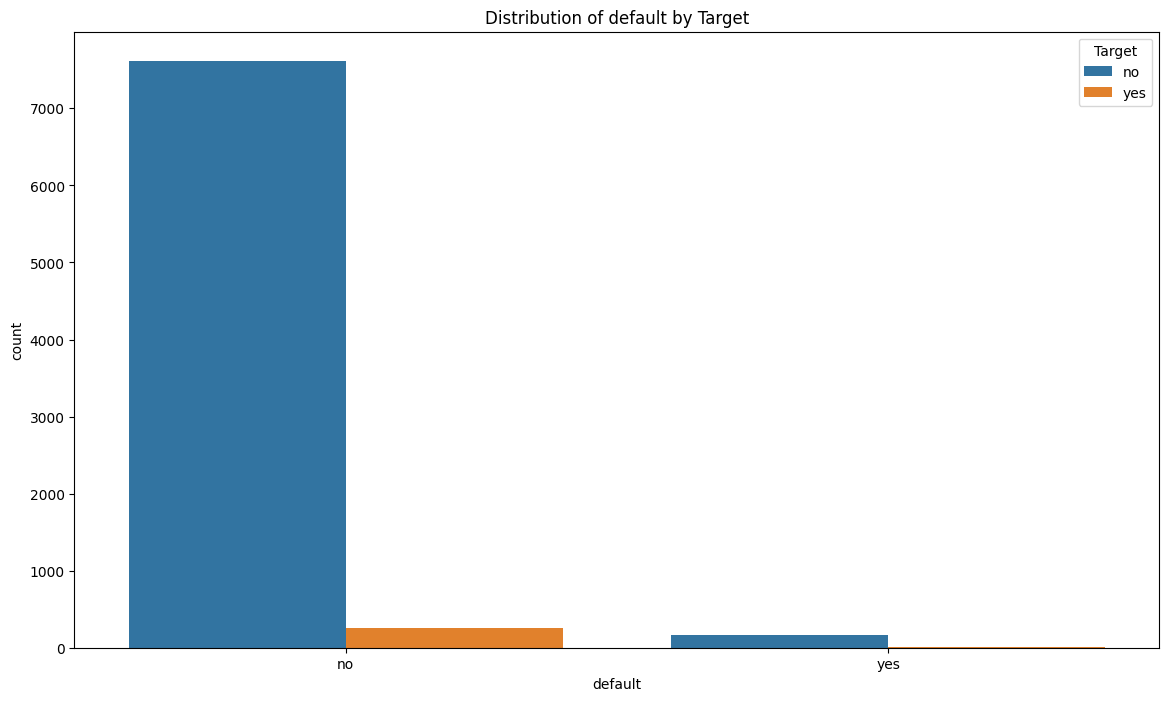

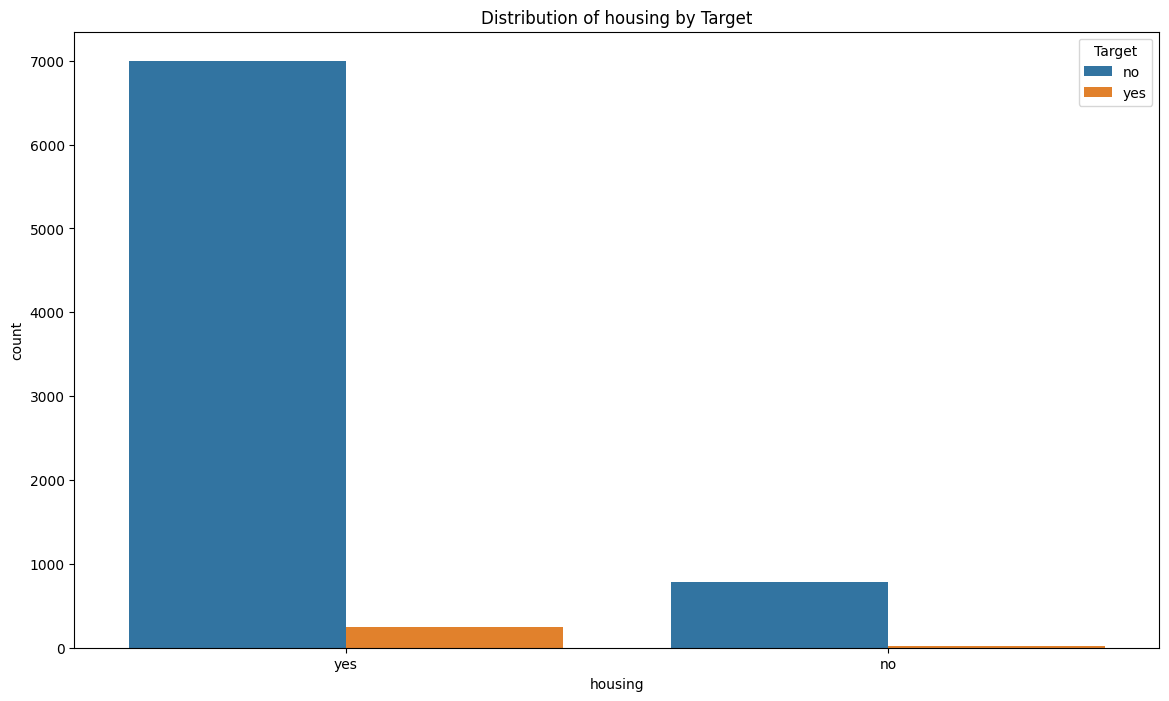

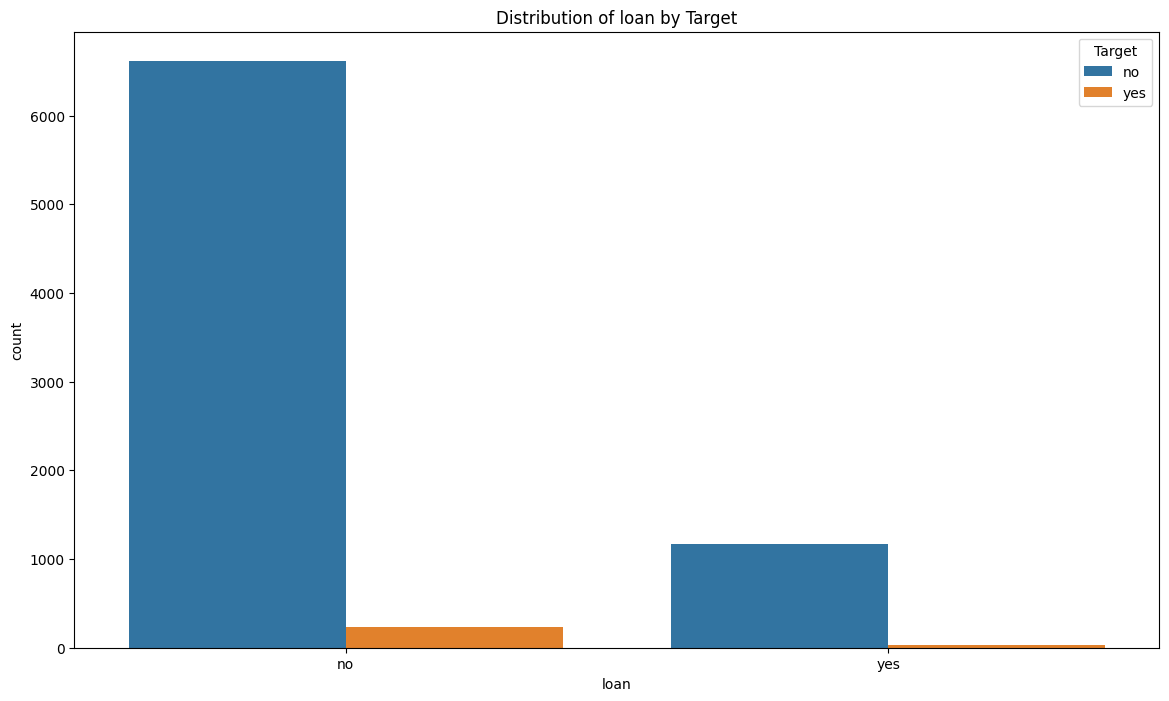

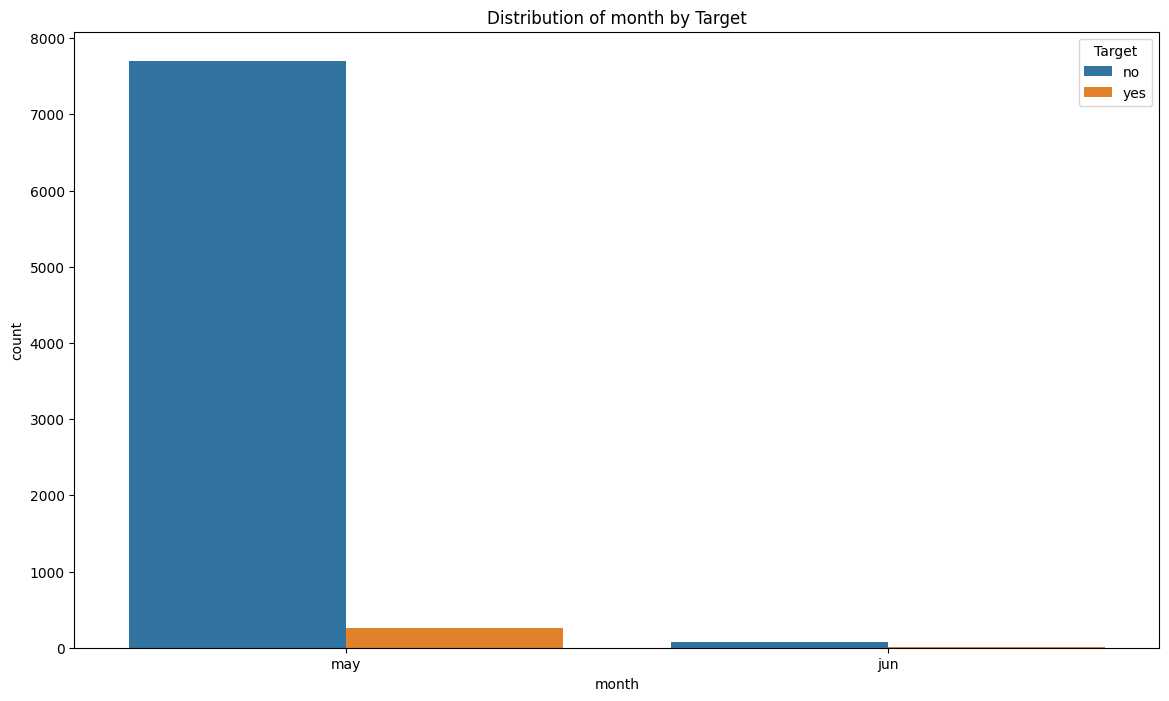

In [17]:
# Explore the distribution of categorical features
cat_cols = ['job', 'education', 'default', 'housing', 'loan', 'month']
for col in cat_cols:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=col, data=df, hue='Target')
    plt.title(f'Distribution of {col} by Target')
    plt.show()

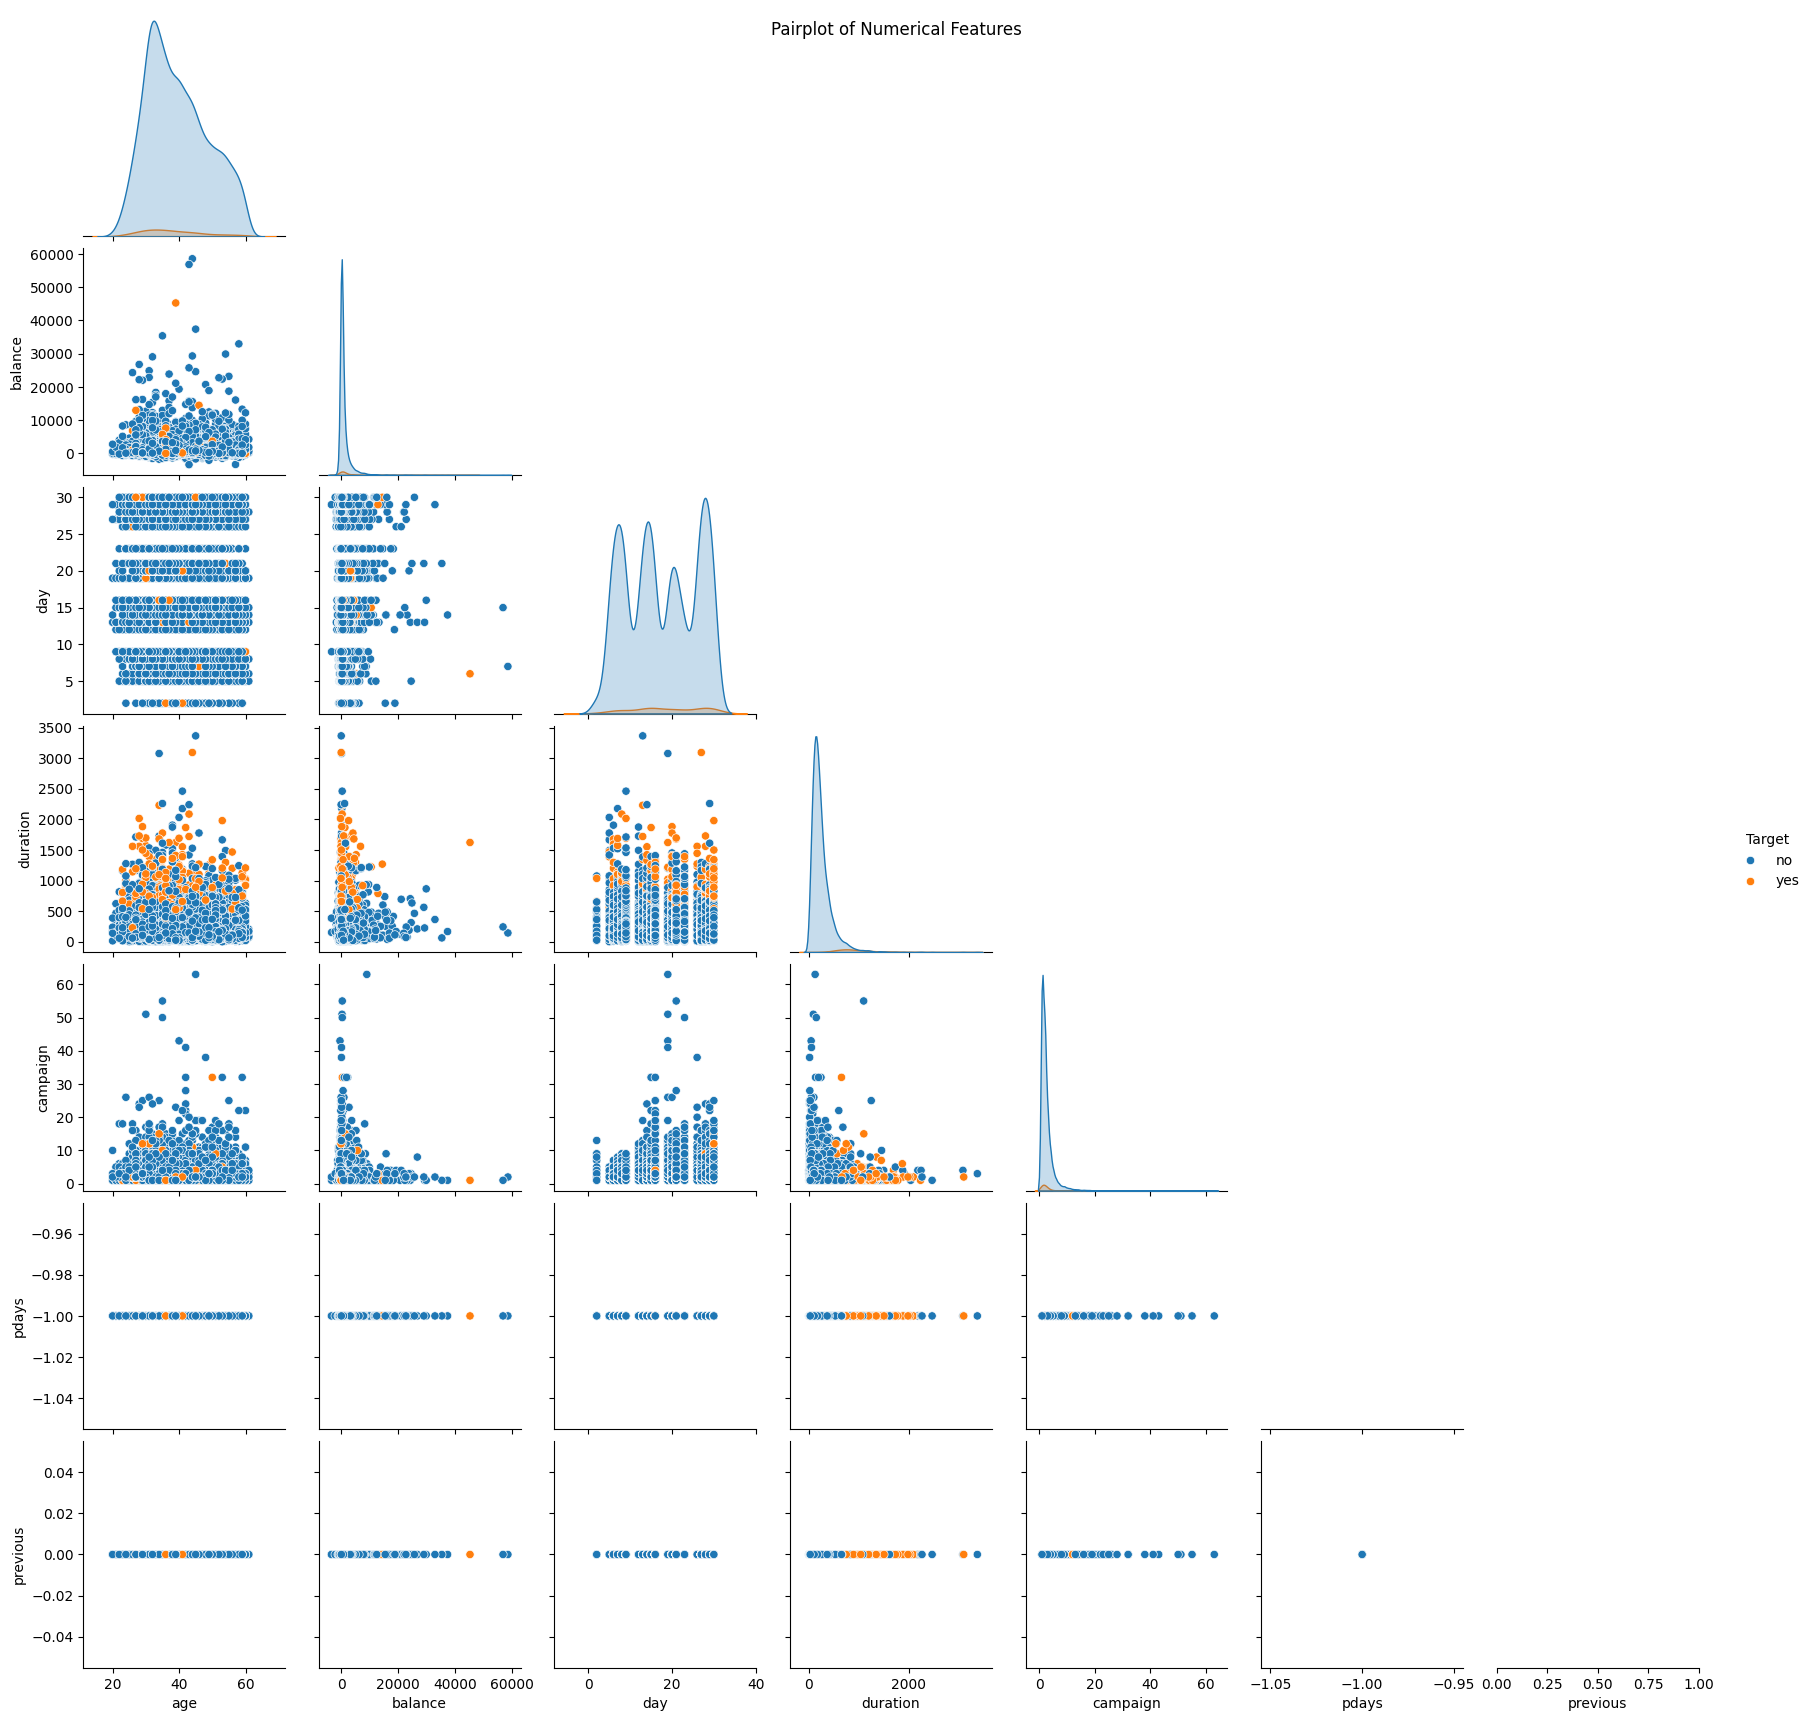

In [18]:
# Explore relationships between numerical features
sns.pairplot(df[num_cols + ['Target']], hue='Target', corner=True)
plt.suptitle('Pairplot of Numerical Features')
plt.show()


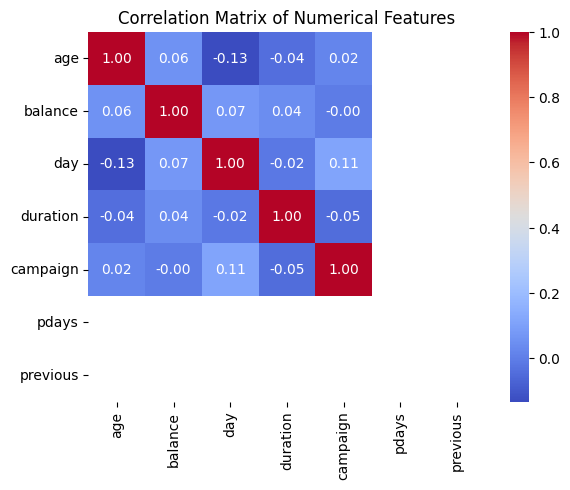

In [19]:
# Explore correlation between numerical features
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


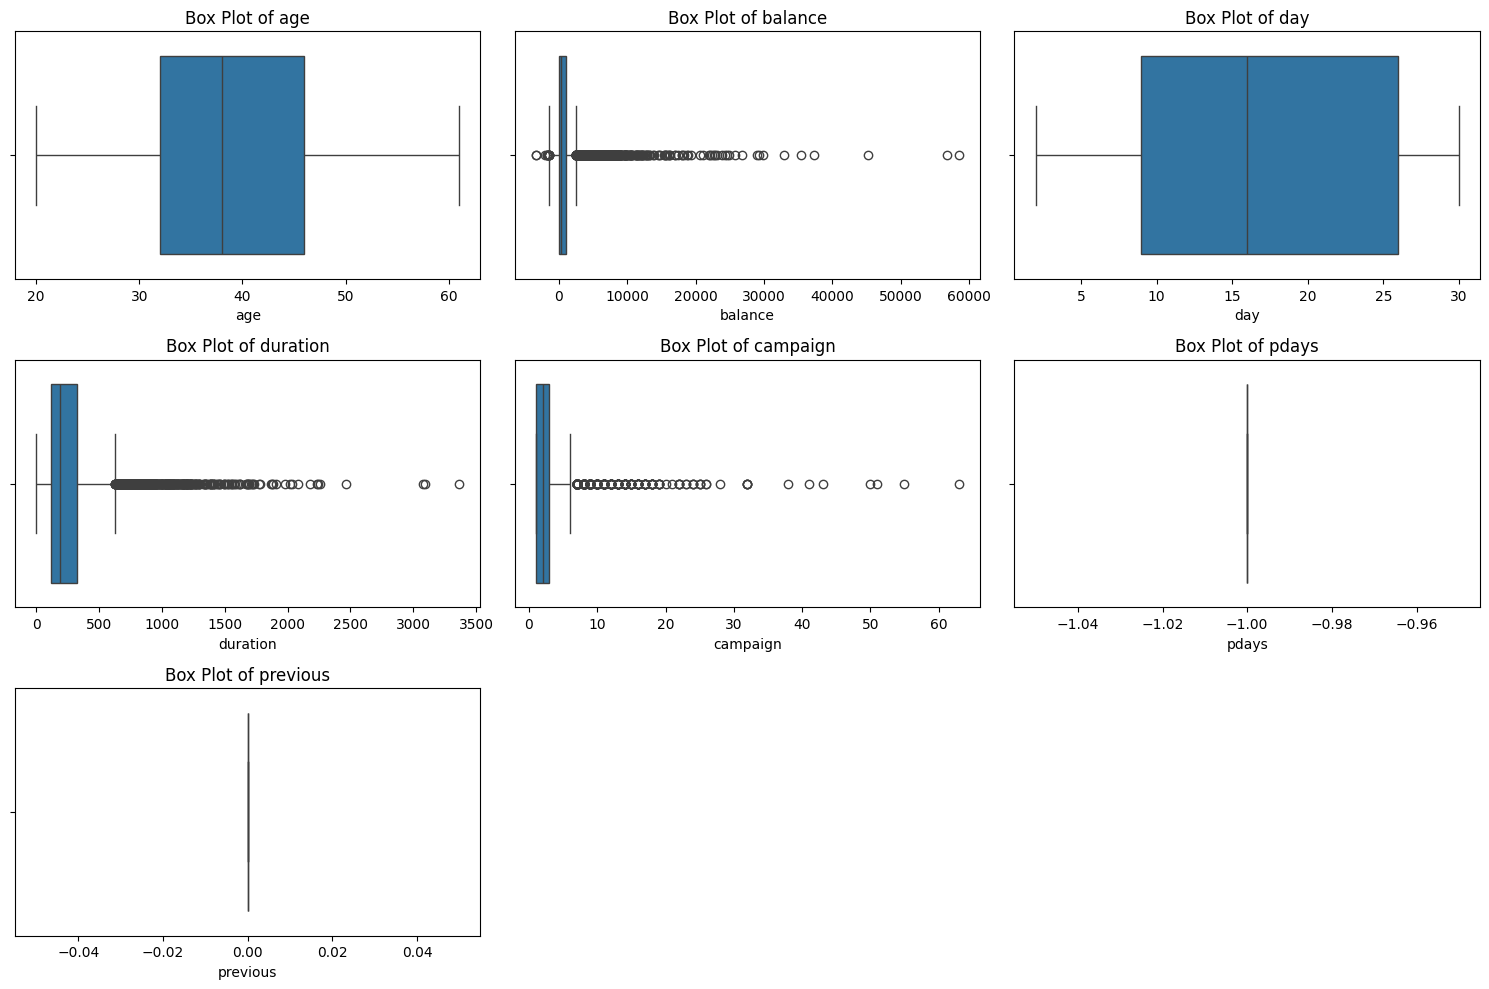

In [20]:
# Create box plots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [21]:
# Columns with outliers
columns_with_outliers = ['duration', 'campaign', 'balance']

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers
df_no_outliers = remove_outliers_iqr(df, columns_with_outliers)




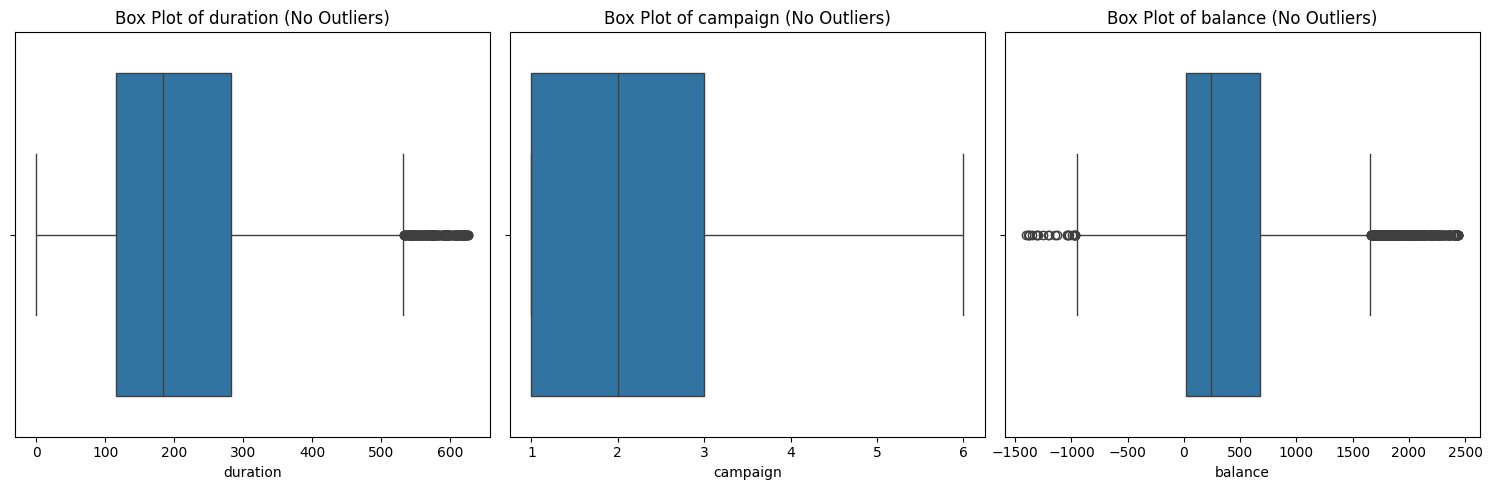

In [22]:
# Visualize the box plots after removing outliers
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_with_outliers, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Box Plot of {column} (No Outliers)')
plt.tight_layout()
plt.show()

In [23]:
# Select categorical columns for one-hot encoding
cat_cols = ['marital','job', 'education', 'default', 'housing', 'loan', 'month','Target']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   age  balance  day  duration  campaign  pdays  previous  marital_divorced  \
0   58     2143    5       261       1.0   -1.0       0.0             False   
1   44       29    5       151       1.0   -1.0       0.0             False   
2   33        2    5        76       1.0   -1.0       0.0             False   
3   47     1506    5        92       1.0   -1.0       0.0             False   
4   33        1    5       198       1.0   -1.0       0.0             False   

   marital_married  marital_single  ...  default_no  default_yes  housing_no  \
0             True           False  ...        True        False       False   
1            False            True  ...        True        False       False   
2             True           False  ...        True        False       False   
3             True           False  ...        True        False       False   
4            False            True  ...        True        False        True   

   housing_yes  loan_no  loan_yes  month_jun

In [24]:
#Seperate independent features from Target

# Identify the dependent feature (target) and independent features
X = df_encoded.drop(['Target_no','Target_yes'],axis=1)  # Replace 'target' with the actual column name
y = df_encoded['Target_no']



In [25]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling to the independent features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a dataframe with the scaled data
df_scaled=pd.DataFrame(data=X_scaled, columns=X.columns)
df_scaled.head()

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,month_jun,month_may
0,2.006815,0.457430,-1.515858,-0.016006,-0.539708,0.0,0.0,-0.368665,0.802813,-0.611657,...,-1.288600,2.027622,0.146087,-0.146087,-0.331719,0.331719,0.418033,-0.418033,-0.102133,0.102133
1,0.492451,-0.398363,-1.515858,-0.456408,-0.539708,0.0,0.0,-0.368665,-1.245621,1.634904,...,0.776036,-0.493188,0.146087,-0.146087,-0.331719,0.331719,0.418033,-0.418033,-0.102133,0.102133
2,-0.697407,-0.409293,-1.515858,-0.756682,-0.539708,0.0,0.0,-0.368665,0.802813,-0.611657,...,0.776036,-0.493188,0.146087,-0.146087,-0.331719,0.331719,-2.392156,2.392156,-0.102133,0.102133
3,0.816958,0.199559,-1.515858,-0.692623,-0.539708,0.0,0.0,-0.368665,0.802813,-0.611657,...,0.776036,-0.493188,0.146087,-0.146087,-0.331719,0.331719,0.418033,-0.418033,-0.102133,0.102133
4,-0.697407,-0.409698,-1.515858,-0.268236,-0.539708,0.0,0.0,-0.368665,-1.245621,1.634904,...,0.776036,-0.493188,0.146087,-0.146087,3.014603,-3.014603,0.418033,-0.418033,-0.102133,0.102133


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Adjust the test_size parameter to control the size of the testing set (e.g., test_size=0.2 for an 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - X shape:", X_train.shape, " y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, " y shape:", y_test.shape)


Training set - X shape: (6432, 32)  y shape: (6432,)
Testing set - X shape: (1608, 32)  y shape: (1608,)


In [27]:
X_train

array([[ 0.16794429, -0.34168772, -1.27440875, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ],
       [ 0.92512645, -0.34492629, -1.51585765, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ],
       [-1.02191338, -0.26517645,  0.17428466, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ],
       ...,
       [-0.69740674, -0.34330701, -1.27440875, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ],
       [ 1.6823086 , -0.07491032,  1.50225362, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ],
       [-1.23825114,  0.29266766,  1.38152917, ..., -0.41803302,
        -0.1021326 ,  0.1021326 ]])

In [28]:
# Build model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.9676616915422885

Confusion Matrix:
[[   9   49]
 [   3 1547]]

Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.16      0.26        58
        True       0.97      1.00      0.98      1550

    accuracy                           0.97      1608
   macro avg       0.86      0.58      0.62      1608
weighted avg       0.96      0.97      0.96      1608



In [33]:
# Make predictions on the training set
y_pred = rf_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
conf_matrix = confusion_matrix(y_train, y_pred)
classification_rep = classification_report(y_train, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 1.0

Confusion Matrix:
[[ 204    0]
 [   0 6228]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       204
        True       1.00      1.00      1.00      6228

    accuracy                           1.00      6432
   macro avg       1.00      1.00      1.00      6432
weighted avg       1.00      1.00      1.00      6432



In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5), verbose=2, n_jobs=-1)

# Perform Grid Search Cross-Validation on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model from the grid search to make predictions on the testing set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_de

In [30]:
# Create a df for Actual values and Predicted values
results= pd.DataFrame({"Actual":y_test, "Predicted":y_pred})
results

,Actual,Predicted
2835,True,True
737,True,True
3334,True,True
7386,True,True
1373,True,True
...,...,...
5513,True,True
3755,True,True
7070,True,True
5572,True,True


In [31]:
test=pd.DataFrame(X_test)
test.to_csv("test_data.csv")

train=pd.DataFrame(X_train)
train.to_csv("train_data.csv")

In [32]:
import pickle
f=open("Term_Deposit_Classifier.pkl","wb")
pickle.dump(best_rf_model,f)
f.close()